In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv(r"C:\Users\mosae\Desktop\USD\AAI 510\Module 1\home-credit-default-risk\application_train.csv"
                   ).set_index('SK_ID_CURR')
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train.shape

(307511, 121)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


## Missing values

In [5]:
missingValue = train.isnull().sum()
missingPersent = 100*train.isnull().sum()/len(train)

missing_val_table = pd.concat([missingValue,missingPersent],axis=1)
missing_values_col = missing_val_table.rename(columns={0:'Missing Value',1 :"percent of value"})
missing_values_col = missing_values_col[missing_val_table.iloc[:,1]!=0].sort_values("percent of value",ascending=False).round(1)
missing_values_col

,Missing Value,percent of value
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [6]:
# droping all the columns with a missing value persantege more than 30% because using a Simpleimputer
# with the median or mean will intreduse bise 
# and because with this highe missing value persentage i can conclude that the variable
# wound not be relevant to create a predictive model

for col in train:
    if (100*train[col].isnull().sum()/len(train[col])) >= 10:
        train = train.drop(columns = col)

train.shape

(307511, 64)

In [7]:
# see the missing values after taking out the outlier
missingValue = train.isnull().sum()
missingPersent = 100*train.isnull().sum()/len(train)

missing_val_table = pd.concat([missingValue,missingPersent],axis=1)
missing_values_col = missing_val_table.rename(columns={0:'Missing Value',1 :"percent of value"})
missing_values_col = missing_values_col[missing_val_table.iloc[:,1]!=0].sort_values("percent of value",ascending=False).round(1)
missing_values_col

,Missing Value,percent of value
NAME_TYPE_SUITE,1292,0.4
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


## Encoder

In [8]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# use OrdinalEncoder to encode the data
from category_encoders import OrdinalEncoder

ordinencod = OrdinalEncoder()
ordinencod.fit(train)

train = ordinencod.transform(train)


In [10]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
100003,0,1,2,1,2,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
100004,0,2,1,2,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,1,1,1,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


## Imputer

In [11]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

result_mean_imputer = mean_imputer.fit_transform(train)

columnsList = [i for i in train]

train = pd.DataFrame(result_mean_imputer, columns=columnsList)

In [12]:
train.isnull().sum().sum()

0

## Ouitleir

In [13]:
train.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,1.095213,1.658370,1.340108,1.306327,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,0.272419,0.293509,0.474284,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,3.000000,2.000000,2.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# creating a data fream for the outlier values

newList = []

for i in train:
    if train[i].dtype!="object":
        q1 = (train[i].describe()['25%'])
        q3 = (train[i].describe()['75%'])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)
        outLier = train[i].loc[(train[i] > upper_bound) | (train[i] < lower_bound) ]
        outLierPrersentage = 100*outLier.count()/len(train)
        newList.append([i,lower_bound, upper_bound, iqr, outLier.count(), outLierPrersentage])

outlier = pd.DataFrame(newList, columns=["features", "lower_bound",
                                         "upper_bound","iqr","outlier_Count","outlierpersentage"
                                        ]).set_index('features').sort_values(
    "outlierpersentage",ascending=False).round(1).T

outlier.head()

features,NAME_FAMILY_STATUS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,REG_CITY_NOT_WORK_CITY,FLAG_WORK_PHONE,NAME_TYPE_SUITE,FLAG_EMP_PHONE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,...,FLAG_MOBIL,FLAG_OWN_CAR,EXT_SOURCE_2,FLAG_DOCUMENT_3,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,FLAG_OWN_REALTY
lower_bound,2.0,2.0,2.0,-6466.5,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,-0.5,-0.0,-1.5,-4.0,-0.5,-30585.5,-8167.5,-1.5,-0.5
upper_bound,2.0,2.0,2.0,3417.5,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,3.5,1.1,2.5,12.0,3.5,-1509.5,2148.5,2.5,3.5
iqr,0.0,0.0,0.0,2471.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.3,1.0,4.0,1.0,7269.0,2579.0,1.0,1.0
outlier_Count,111079.0,80527.0,78027.0,72217.0,70867.0,61308.0,58985.0,55386.0,55215.0,36187.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
outlierpersentage,36.1,26.2,25.4,23.5,23.0,19.9,19.2,18.0,18.0,11.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# looking at the outlier dataframe we can see that there is variable with a high outlier persentage in the datafream. 
# there for we will drob the columns with a 4% outlier since the outlier value is high i can conclude that the variable
# wound not be relevant to create a predictive model

for col in outlier:
    if col != "TARGET":
        if outlier[col]["outlierpersentage"] >= 1:
            train = train.drop(columns = col)

train.shape

(307511, 31)

## Corelations

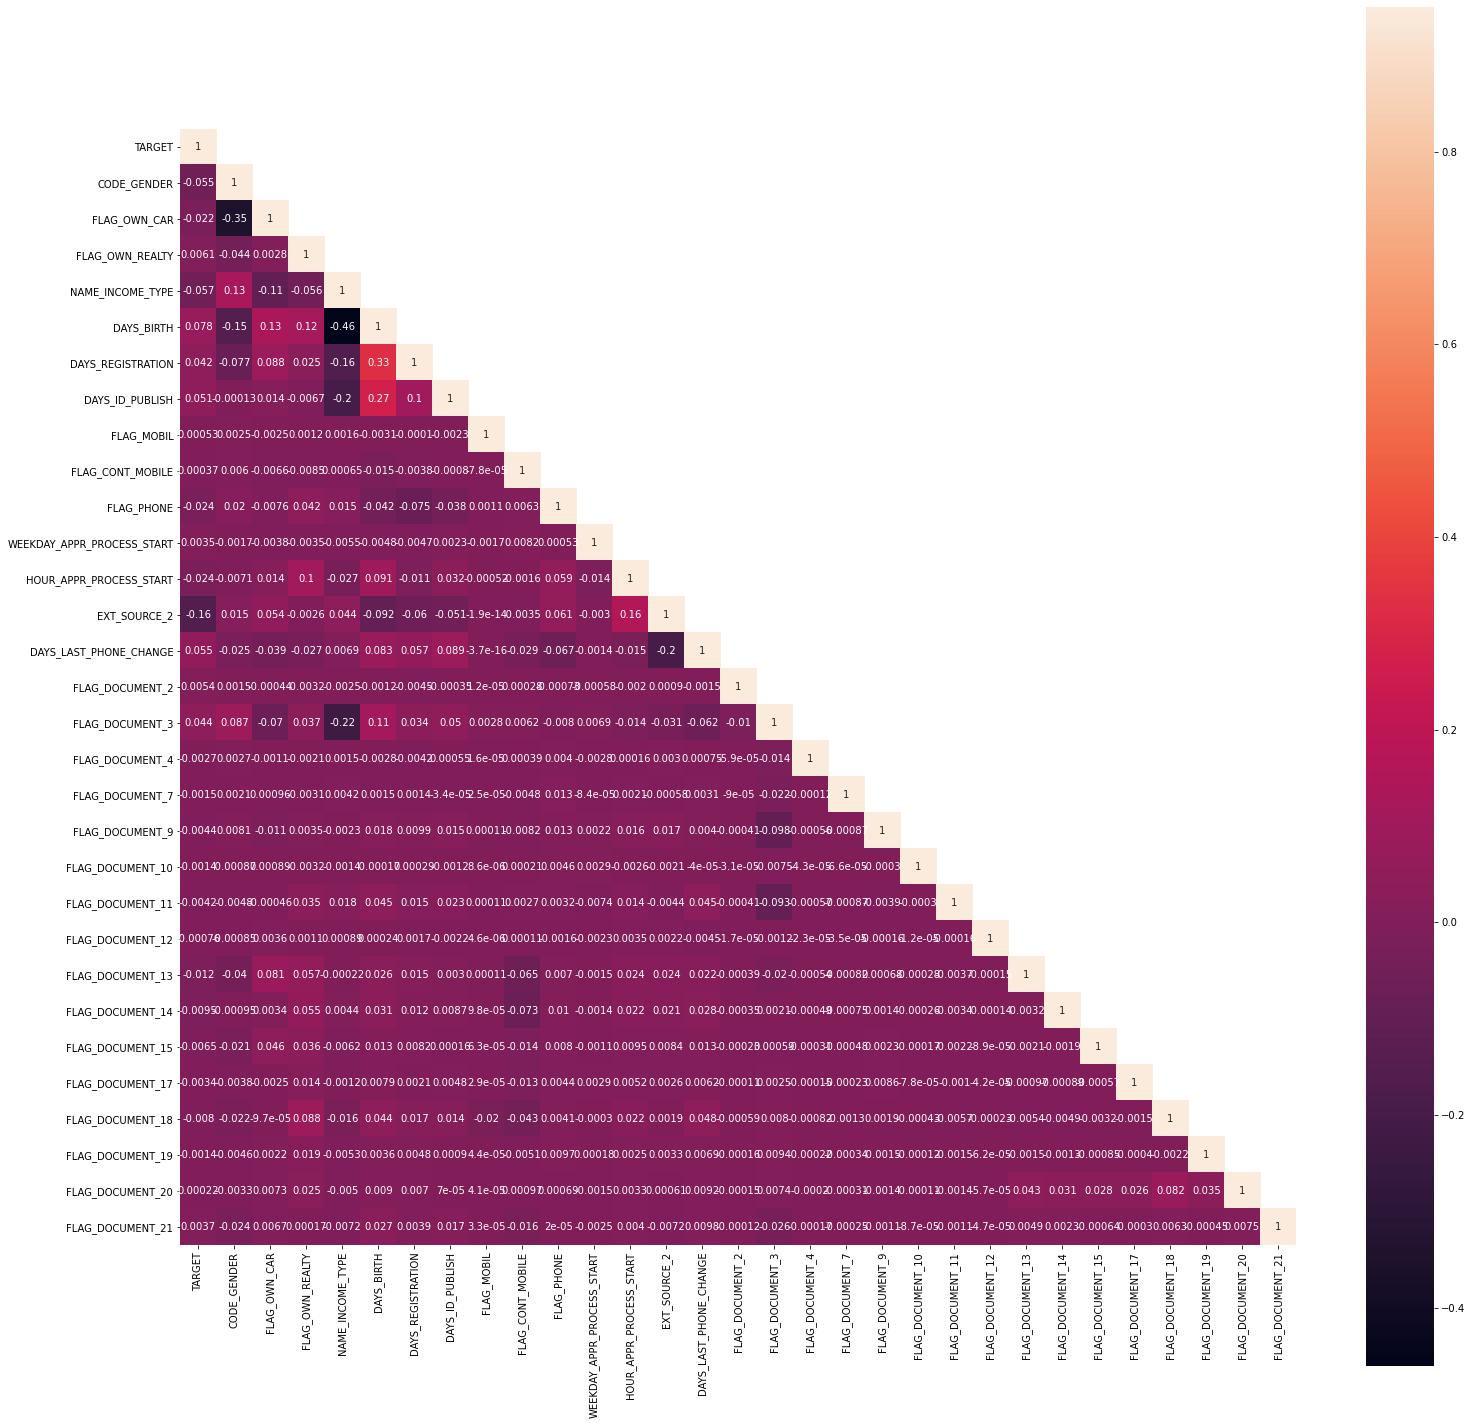

In [16]:
# One of the best places to start understanding the relationship 
# between the independent variable is the correlation between the variables.

fig, ax = plt.subplots(figsize=(25,25))
corrMatrix = train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatrix, mask=mask, vmax=.95, square=True,annot=True, ax=ax)
plt.show()

In [30]:
#Correlation with output variable
cor_target = (corrMatrix["TARGET"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0005]
relevant_features

TARGET                        1.000000
FLAG_OWN_REALTY               0.006148
DAYS_BIRTH                    0.078239
DAYS_REGISTRATION             0.041975
DAYS_ID_PUBLISH               0.051457
FLAG_MOBIL                    0.000534
WEEKDAY_APPR_PROCESS_START    0.003478
DAYS_LAST_PHONE_CHANGE        0.055218
FLAG_DOCUMENT_2               0.005417
FLAG_DOCUMENT_3               0.044346
FLAG_DOCUMENT_21              0.003709
Name: TARGET, dtype: float64

#looking at the corelation of the target feature we see that the corellation is so low. as we can see those the top-ten variables that will be most relevant to create a predictive model with is are 

* FLAG_OWN_REALTY
* DAYS_BIRTH
* DAYS_REGISTRATION
* DAYS_ID_PUBLISH
* WEEKDAY_APPR_PROCESS_START
* DAYS_LAST_PHONE_CHANGE
* FLAG_DOCUMENT_2
* FLAG_DOCUMENT_3
* FLAG_DOCUMENT_21
* FLAG_MOBIL

I deployed a Logistic Regression model to see if i am right 

## Decision Tree Classifier  top 10 variable 

In [31]:
train.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1.0,1.0,1.0,1.0,1.0,-9461.0,-3648.0,-2120.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,2.0,2.0,-16765.0,-1186.0,-291.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,1.0,1.0,-19046.0,-4260.0,-2531.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1.0,1.0,1.0,-19005.0,-9833.0,-2437.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,1.0,-19932.0,-4311.0,-3458.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### the top-ten variables i chose in Module 1

In [32]:
dataList  =[ 'TARGET', 'FLAG_OWN_REALTY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
            'WEEKDAY_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 
            'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_21', 'FLAG_MOBIL']
top10Var = train.copy()
# creat a dataFrame with only the taget column and the top-ten variable
for col in top10Var:
    if col not in dataList:
        top10Var = top10Var.drop(columns = col)
        
top10Var.head()

,TARGET,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_21
0,1.0,1.0,-9461.0,-3648.0,-2120.0,1.0,1.0,-1134.0,0.0,1.0,0.0
1,0.0,2.0,-16765.0,-1186.0,-291.0,1.0,2.0,-828.0,0.0,1.0,0.0
2,0.0,1.0,-19046.0,-4260.0,-2531.0,1.0,2.0,-815.0,0.0,0.0,0.0
3,0.0,1.0,-19005.0,-9833.0,-2437.0,1.0,1.0,-617.0,0.0,1.0,0.0
4,0.0,1.0,-19932.0,-4311.0,-3458.0,1.0,3.0,-1106.0,0.0,0.0,0.0


### split data

In [33]:
# the DecisionTreeClassifier matrix is 
X = top10Var.drop(columns = 'TARGET')
# the DecisionTreeClassifier target is 
y = top10Var['TARGET']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state =42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_test shape {X_val.shape} ----> y_test shape  {y_val.shape}')

X_train shape (276759, 10) ----> y_train shape  (276759,) 
X_test shape (30752, 10) ----> y_test shape  (30752,)


## Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DT_model  = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DT_model.fit(X_train, y_train)
y_pred_en = DT_model.predict(X_val)

## Evaluating Result

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_val, y_pred_en)))

Model accuracy score with criterion entropy: 0.9181


In [38]:
print("Training Accuracy - Decision Tree top 10", round(DT_model.score(X_train, y_train),4))
print("Validation Accuracy - Decision Tree top 10", round(DT_model.score(X_val, y_val),4))

Training Accuracy - Decision Tree top 10 0.9194
Validation Accuracy - Decision Tree top 10 0.9181


## Visualizing Tree

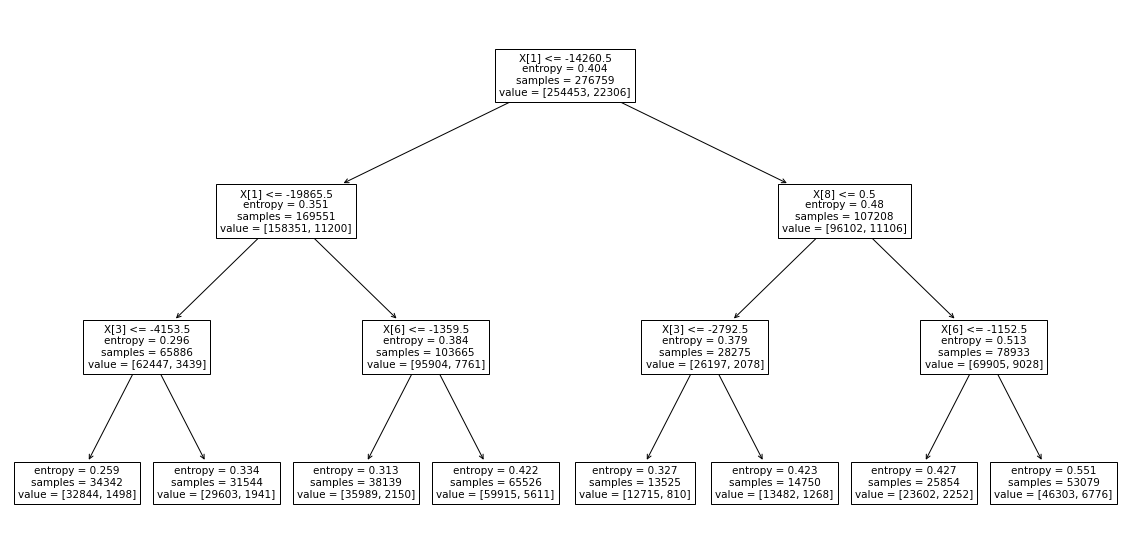

In [39]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(DT_model.fit(X_train, y_train))
plt.show()

## Random Forest all the variable

### split data

In [40]:
# the RandomForestClassifier matrix is 
X = train.drop(columns = 'TARGET')
# the RandomForestClassifier target is 
y = train['TARGET']

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state =42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_test shape {X_val.shape} ----> y_test shape  {y_val.shape}')

X_train shape (276759, 30) ----> y_train shape  (276759,) 
X_test shape (30752, 30) ----> y_test shape  (30752,)


## Model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF_model  = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred_en = RF_model.predict(X_val)

## Evaluating Result

In [44]:
print('Random Forest Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_en)))

Random Forest Classifier accuracy score: 0.9180


In [45]:
print("Training Accuracy - Random Forest", round(RF_model.score(X_train, y_train),4))
print("Validation Accuracy - Random Forest", round(RF_model.score(X_val, y_val),4))

Training Accuracy - Random Forest 0.9999
Validation Accuracy - Random Forest 0.918


### the variable importance chart

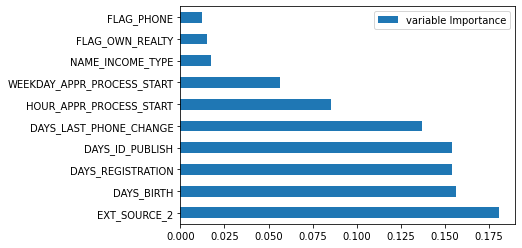

In [46]:
variableImportance = pd.DataFrame(data=RF_model.feature_importances_, index=X_train.columns, columns=['variable Importance']
                                 ).abs().sort_values(
    by='variable Importance', ascending=False).head(10).plot(kind='barh')


plt.show()

Looking at the top 10 variable importance in the randome forest model and comper them with the top 10 importent variable i chose. I see 6 out of the 10 variable are in the top 10 variable imprtance of the randome forest model. These 6 variable are ***('FLAG_OWN_REALTY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE')***. the 4 variable i was not able to predict are ***('FLAG_PHONE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2')***

# Using only the top-ten variables from the variable importance plot

## Random Forest top-ten

In [47]:
dataList  =[ 'TARGET', 'FLAG_OWN_REALTY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
            'WEEKDAY_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE',
            'FLAG_PHONE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2']

top10Varimport = train.copy()
# creat a dataFrame with only the taget column and the top-ten variable
for col in top10Var:
    if col not in dataList:
        top10Varimport = top10Var.drop(columns = col)
        
top10Varimport.head()

,TARGET,FLAG_OWN_REALTY,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,WEEKDAY_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3
0,1.0,1.0,-9461.0,-3648.0,-2120.0,1.0,1.0,-1134.0,0.0,1.0
1,0.0,2.0,-16765.0,-1186.0,-291.0,1.0,2.0,-828.0,0.0,1.0
2,0.0,1.0,-19046.0,-4260.0,-2531.0,1.0,2.0,-815.0,0.0,0.0
3,0.0,1.0,-19005.0,-9833.0,-2437.0,1.0,1.0,-617.0,0.0,1.0
4,0.0,1.0,-19932.0,-4311.0,-3458.0,1.0,3.0,-1106.0,0.0,0.0


### split data

In [48]:
# the matrix is 
X = top10Varimport.drop(columns = 'TARGET')
# the target is 
y = top10Varimport['TARGET']

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state =42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_test shape {X_val.shape} ----> y_test shape  {y_val.shape}')

X_train shape (276759, 9) ----> y_train shape  (276759,) 
X_test shape (30752, 9) ----> y_test shape  (30752,)


## Model

### RandomForestClassifier

In [50]:
RF_top10_model  = RandomForestClassifier()
RF_top10_model.fit(X_train, y_train)
y_pred_en_top10 = RF_top10_model.predict(X_val)

#### Evaluating Result

In [51]:
print('Random Forest Classifier accuracy score for the top 10: {0:0.4f}'. format(accuracy_score(y_val, y_pred_en_top10)))

Random Forest Classifier accuracy score for the top 10: 0.9180


In [52]:
print("Training Accuracy - Random Forest using top-ten variables", round(RF_top10_model.score(X_train, y_train),4))
print("Validation Accuracy - Random Forest using top-ten variables", round(RF_top10_model.score(X_val, y_val),4))

Training Accuracy - Random Forest using top-ten variables 0.9999
Validation Accuracy - Random Forest using top-ten variables 0.918


### Decision Tree Classifier

In [53]:
DT_top10_model  = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DT_top10_model.fit(X_train, y_train)
y_pred_en_top10 = DT_top10_model.predict(X_val)

#### Evaluating Result

In [54]:
print('Decision Tree Classifier accuracy score for the top 10: {0:0.4f}'. format(accuracy_score(y_val, y_pred_en_top10)))

Decision Tree Classifier accuracy score for the top 10: 0.9181


In [55]:
print("Training Accuracy - Decision Tree using top-ten variables", round(DT_top10_model.score(X_train, y_train),4))
print("Validation Accuracy - Decision Tree using top-ten variables", round(DT_top10_model.score(X_val, y_val),4))

Training Accuracy - Decision Tree using top-ten variables 0.9194
Validation Accuracy - Decision Tree using top-ten variables 0.9181


## Visualizing Tree

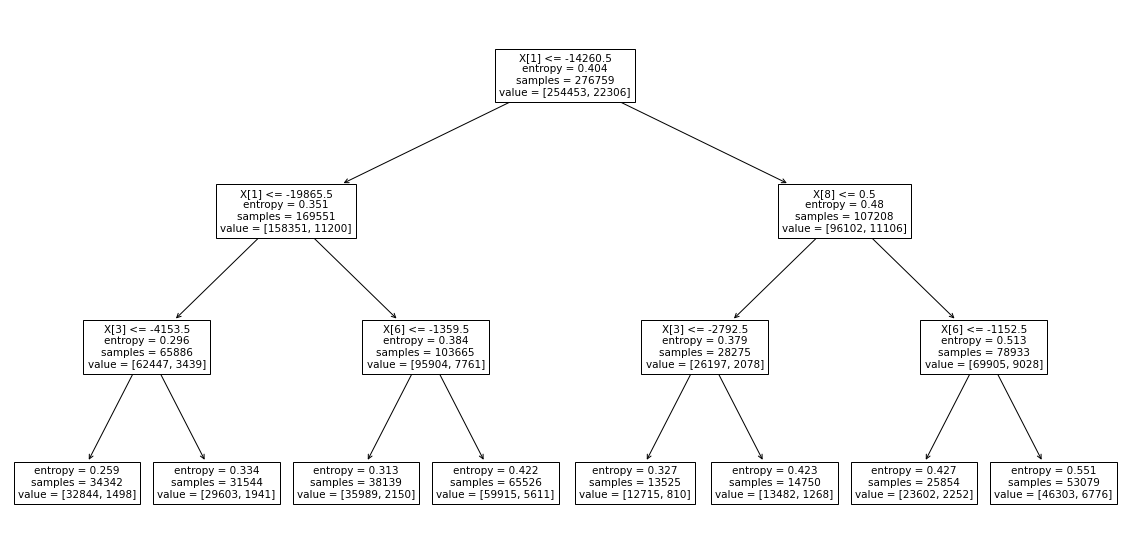

In [56]:
plt.figure(figsize=(20,10))
tree.plot_tree(DT_top10_model.fit(X_train, y_train))
plt.show()

compering the two models the Decision Tree and Random Forest. we can see that the Random Forest model is overfitting the data. where the Training Accuracy is aloms 1. on the other hand Decision Tree model is a good fit of the data where the Training Accuracy and Validation Accuracy are close to each other. 
* Decision Tree Training Accuracy is 0.9194
* Decision Tree Validation Accuracy is 0.9181